## in this notebook i'll make a clasifier to classify hand writing digit

### importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn

### load the data from keras datasets

In [2]:
keras.datasets.mnist.load_data();

In [3]:
(X_train, Y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

### data scalling for better accuracy

In [4]:
X_test = X_test/255
X_train = X_train/255

In [5]:
len(X_train), len(Y_train)

(60000, 60000)

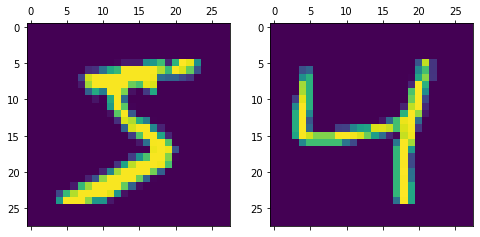

In [6]:
fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(121)
ax1.matshow(X_train[0])

ax2 = fig.add_subplot(122)
ax2.matshow(X_train[2])

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [9]:
X_train_flattened.shape

(60000, 784)

### a simple neural network with no hiding layars

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
    
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4675 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9256


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2700 - accuracy: 0.9266


[0.2700180411338806, 0.9265999794006348]

### making some predictions

In [12]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [13]:
np.argmax(y_predicted[1])

2

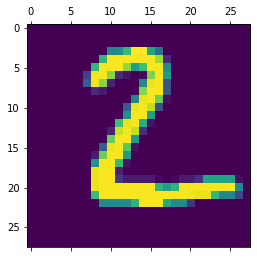

In [14]:
plt.matshow(X_test[1])

### confusing matrix

In [15]:
a = y_test
for i in range(10000):
    a[i] = np.argmax(y_predicted[i][:])


In [16]:
y_prediction = np.argmax (y_predicted, axis = 1)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'truth')

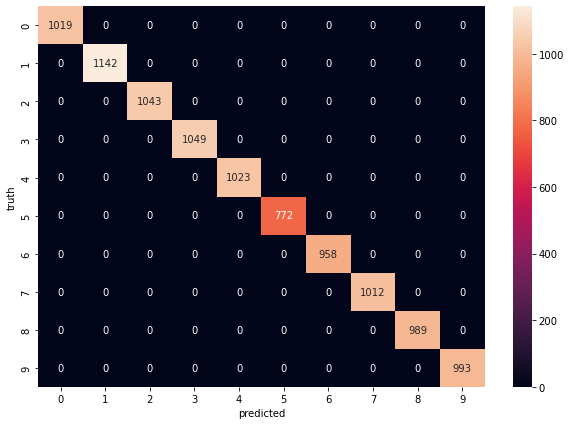

In [17]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel('predicted')
plt.ylabel('truth')

### neural nets using 24 hiding layers

In [18]:
model = keras.Sequential([
    keras.layers.Dense(24, input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10 ,activation = 'sigmoid')
    
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4039 - accuracy: 0.8864
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2197 - accuracy: 0.9376
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1835 - accuracy: 0.9477
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1603 - accuracy: 0.9535
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9580
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1326 - accuracy: 0.9609
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1229 - accuracy: 0.9639
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1157 - accuracy: 0.9661
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1091 - accuracy: 0.9678
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.102

### neural nets using 10 and then 16 hiding layers

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(16 ,activation = 'sigmoid'),
    keras.layers.Dense(10 ,activation = 'sigmoid')

    
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8658 - accuracy: 0.7999
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3415 - accuracy: 0.9097
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.9216
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2566 - accuracy: 0.9279
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2417 - accuracy: 0.9317
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2304 - accuracy: 0.9346
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2216 - accuracy: 0.9361
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2141 - accuracy: 0.9388
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2093 - accuracy: 0.9390
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.203

In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1821 - accuracy: 0.9382


[0.18212509155273438, 0.9381999969482422]

In [21]:
score, acc = model.evaluate(X_test_flattened, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1821 - accuracy: 0.9382
Test score: 0.18212509155273438
Test accuracy: 0.9381999969482422


In [22]:
y_predicted = model.predict(X_test_flattened)


313/313 [==============================] - 1s 2ms/step


### confusing matrix

In [23]:
y_prediction = np.argmax (y_predicted, axis = 1)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'truth')

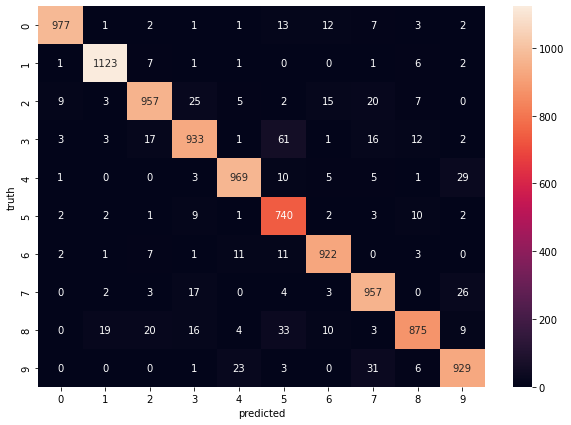

In [24]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel('predicted')
plt.ylabel('truth')